In [ ]:
# Frequent Items Behavior

## Loading data from csvs

All the data was extracted from production rules, to observe the impact over the configurations change in the frequent items for generating trends.

In [66]:
%matplotlib inline

import pandas as pd
import numpy as np
import math
from datetime import datetime

columns = ['item', 'value', 'datetime']
df_hashtag_5   = pd.read_csv('data/20150602_frequent_items_hashtag_5171_5', header=0, names=columns)
df_hashtag_20  = pd.read_csv('data/20150602_frequent_items_hashtag_5171_20', header=0, names=columns)
df_hashtag_100 = pd.read_csv('data/20150602_frequent_items_hashtag_5171_100', header=0, names=columns)
df_url_5       = pd.read_csv('data/20150602_frequent_items_url_5171_5', header=0, names=columns, sep=',')
df_url_20      = pd.read_csv('data/20150602_frequent_items_url_5171_20', header=0, names=columns, sep=',')
df_url_100     = pd.read_csv('data/20150602_frequent_items_url_5171_100', header=0, names=columns, sep=',')

df_hashtag_5.head()

,item,value,datetime
0,astronaut,1,20150526
1,astronaut,1,20150526
2,astronaut,1,20150526
3,astronaut,1,20150526
4,astronaut,1,20150526


In [67]:
##########
# Adjusting datetime column type
#

df_hashtag_5['datetime'] = pd.to_datetime(df_hashtag_5['datetime'], format='%Y%m%d')
df_hashtag_20['datetime'] = pd.to_datetime(df_hashtag_20['datetime'], format='%Y%m%d')
df_hashtag_100['datetime'] = pd.to_datetime(df_hashtag_100['datetime'], format='%Y%m%d')
df_url_5['datetime'] = pd.to_datetime(df_url_5['datetime'], format='%Y%m%d')
df_url_20['datetime'] = pd.to_datetime(df_url_20['datetime'], format='%Y%m%d')
df_url_100['datetime'] = pd.to_datetime(df_url_100['datetime'], format='%Y%m%d')
df_hashtag_5.head()

,item,value,datetime
0,astronaut,1,2015-05-26
1,astronaut,1,2015-05-26
2,astronaut,1,2015-05-26
3,astronaut,1,2015-05-26
4,astronaut,1,2015-05-26


# Statistics on the data frames

Good to have an overview on how mean and stds behaves on setups like 5, 20 and 100 top frequent items

### Analysing Hashtags Frequent Items Data

Aparently For the rule 5171 that have a high volume, the best configuration is 5 hashtags, that shows a better value for mean and std.

In [100]:
for df in [df_hashtag_5, df_hashtag_20, df_hashtag_100]:
    print(df.describe())
    print(' ')

              value
count  62276.000000
mean      84.845735
std      166.107330
min        1.000000
25%        1.000000
50%        6.000000
75%       67.000000
max      617.000000
 
              value
count  62276.000000
mean     390.730057
std      342.366507
min        1.000000
25%      116.000000
50%      250.000000
75%      610.000000
max     1151.000000
 
              value
count  62276.000000
mean     988.407059
std      632.425503
min        1.000000
25%      437.000000
50%      974.000000
75%     1788.000000
max     1840.000000
 


Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


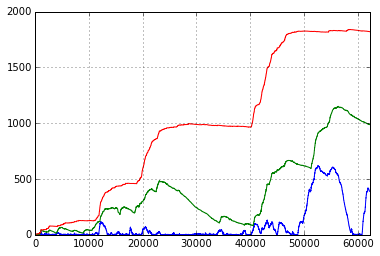

In [70]:
for df in [df_hashtag_5, df_hashtag_20, df_hashtag_100]:
    print(df['value'].plot())

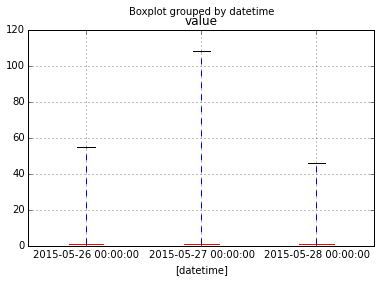

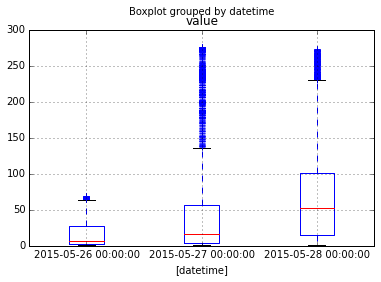

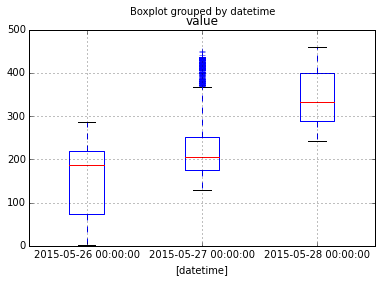

In [95]:
for df in [df_url_5, df_url_20, df_url_100]:
    df[df['datetime'] >= datetime(2015, 5, 26)].boxplot(by='datetime')

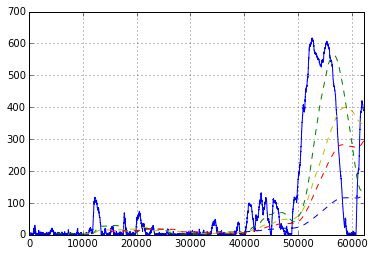

In [107]:
df_hashtag_5['value'].plot()
pd.rolling_mean(df_hashtag_5['value'], window=5000).plot(style='g--')
pd.rolling_mean(df_hashtag_5['value'], window=10000).plot(style='y--')
pd.rolling_mean(df_hashtag_5['value'], window=15000).plot(style='r--')
pd.rolling_mean(df_hashtag_5['value'], window=40000).plot(style='b--')

### Analysing Hashtags Frequent Items Data

Aparently For the rule 5171 that have a high volume, the best configuration is 20 for urls.

In [103]:
for df in [df_url_5, df_url_20, df_url_100]:
    print(df.describe())
    print(' ')

              value
count  62218.000000
mean       2.191392
std        7.390489
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      108.000000
 
              value
count  62276.000000
mean      48.855691
std       61.446400
min        1.000000
25%        5.000000
50%       25.000000
75%       71.000000
max      276.000000
 
              value
count  62276.000000
mean     254.205585
std       97.099316
min        1.000000
25%      191.000000
50%      250.000000
75%      314.000000
max      460.000000
 


Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


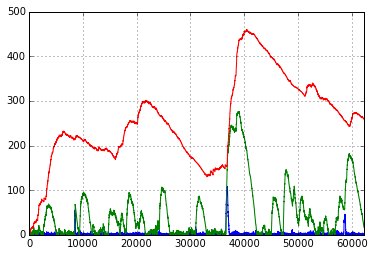

In [102]:
for df in [df_url_5, df_url_20, df_url_100]:
    print(df['value'].plot())

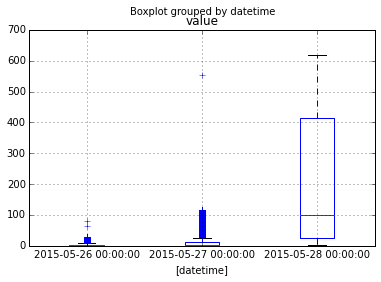

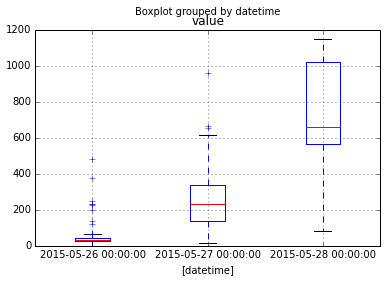

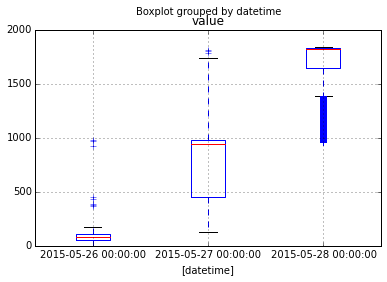

In [104]:
for df, title in [[df_hashtag_5, '5 Frequent Items'], [df_hashtag_20, '20 Frequent Items'], [df_hashtag_100, '100 Frequent Items']]:
    df[df['datetime'] >= datetime(2015, 5, 26)].boxplot(by='datetime')

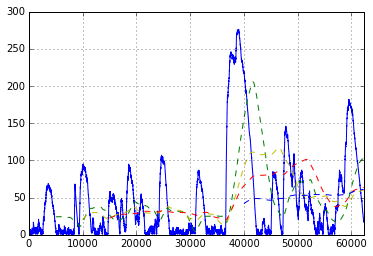

In [108]:
df_url_20['value'].plot()
pd.rolling_mean(df_url_20['value'], window=5000).plot(style='g--')
pd.rolling_mean(df_url_20['value'], window=10000).plot(style='y--')
pd.rolling_mean(df_url_20['value'], window=15000).plot(style='r--')
pd.rolling_mean(df_url_20['value'], window=40000).plot(style='b--')